<a href="https://colab.research.google.com/github/DanielOlivera/TensorFlow/blob/main/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

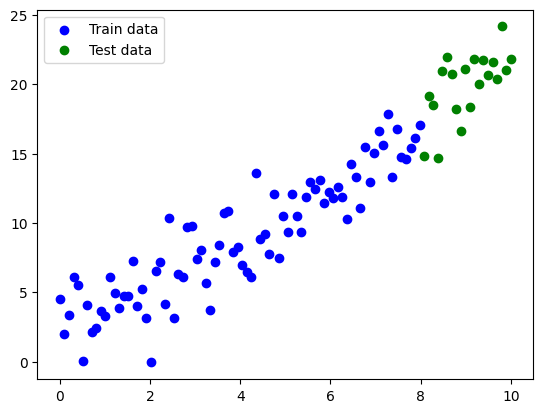

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(0)
X = np.linspace(0, 10, 100)
Y = 2 * X + 1 + np.random.randn(100) * 2

# Dividir los datos en entrenamiento y prueba
X_train, X_test = X[:80], X[80:]
Y_train, Y_test = Y[:80], Y[80:]

plt.scatter(X_train, Y_train, color='blue', label='Train data')
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

# Construir una red neuronal sin regularización
model_no_reg = Sequential([
    Dense(64, input_dim=1, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model_no_reg.compile(optimizer='adam', loss='mse')

# Construir una red neuronal con regularización L2
model_with_reg = Sequential([
    Dense(64, input_dim=1, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compilar el modelo
model_with_reg.compile(optimizer='adam', loss='mse')


In [ ]:
# Entrenar el modelo sin regularización
history_no_reg = model_no_reg.fit(X_train, Y_train, epochs=100, validation_split=0.2, verbose=0)

# Entrenar el modelo con regularización L2
history_with_reg = model_with_reg.fit(X_train, Y_train, epochs=100, validation_split=0.2, verbose=0)


1/1 [==============================] - 0s 60ms/step


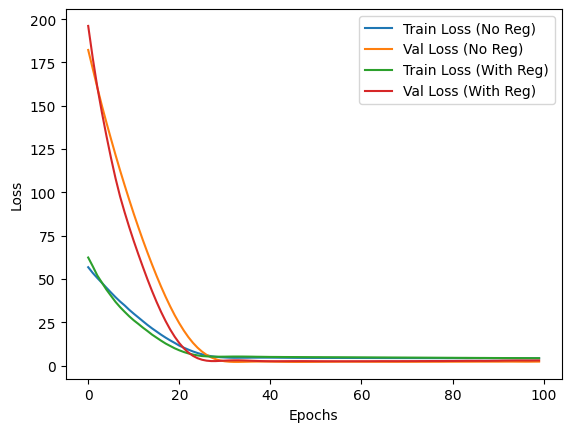

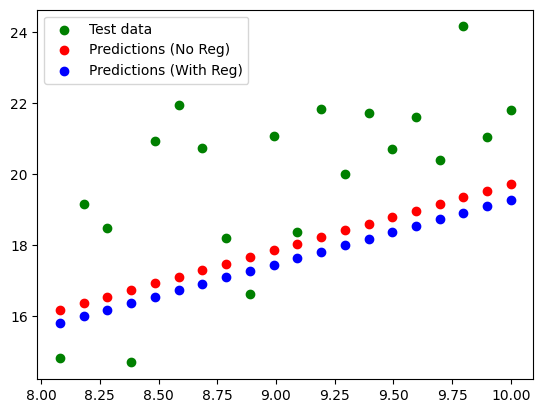

In [ ]:
# Predicciones
Y_pred_no_reg = model_no_reg.predict(X_test)
Y_pred_with_reg = model_with_reg.predict(X_test)

# Gráficos de las pérdidas
plt.plot(history_no_reg.history['loss'], label='Train Loss (No Reg)')
plt.plot(history_no_reg.history['val_loss'], label='Val Loss (No Reg)')
plt.plot(history_with_reg.history['loss'], label='Train Loss (With Reg)')
plt.plot(history_with_reg.history['val_loss'], label='Val Loss (With Reg)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Gráficos de las predicciones
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.scatter(X_test, Y_pred_no_reg, color='red', label='Predictions (No Reg)')
plt.scatter(X_test, Y_pred_with_reg, color='blue', label='Predictions (With Reg)')
plt.legend()
plt.show()
